<b>Jacob J. Zhang</b><br>
<i>CISC 5420 Final Project</i><br>
Why Do Higher Populated Regions Provide a Higher Well-Being Index?

The question I had posed for the midterm project was whether or not regions with lower populations had a higher well-being index, as defined by 1) access to education, 2) access to healthcare, and 3) income. For that project, I analyzed the different components separately, finding out that each benefitted from more residents, before coming up a composite metric that enabled us to see the big picture. We ended up seeing trends where densely populated regions seemed to provide 1) less students per school, 2) slightly more "access" to healthcare, and 3) greater incomes-- all things which contributed to having a stronger composite index score for our well-being metric.

With this finding, I then began to ponder why this was the case. As populations grow, one would expect the number of health establishments (our metric for healthcare access) and educational establishments (metric for educational access) to continue to be proportional to the overal population. However, our analysis seemed to indicate that they actually scaled faster than population-- meaning as population grew, the number of these socially-positive instituions grew faster. This created an environment where there is a low resident-to-establishment ratio, a very good thing enabling more individualized personal care medically, and smaller classes in schools (theoretically). Here is a table with our findings thus far:

In [48]:
%matplotlib inline
import numpy
import pandas
import scipy
from scipy import stats
from scipy.stats.mstats import gmean

# Importing and formatting population data
pop_index = pandas.read_csv('datasets/population_values.csv', sep=',', index_col=False, encoding='latin-1', skiprows=1, skipfooter=4, engine='python').set_index('Geographic region', drop=False)
latest_pop = pop_index[pop_index['Geographic region'] != 'United States']['Population Estimate (as of July 1) - 2015']

# Importing and formatting educational establishment data
edu_by_geo = pandas.read_csv('datasets/educational_est_values.csv', sep=',', encoding='latin-1', skiprows=1).set_index('Geographic area name', drop=False)
all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']

# Importing and formatting health establishment data
health_est = pandas.read_csv('datasets/health_est_values.csv', sep=',', encoding='latin-1', skiprows=1).set_index('Geographic area name', drop=False)
health_est_all = health_est[health_est['Meaning of Type of operation or tax status code'] == 'All establishments']

# Concatenating health and educational data
flattened_all_health_est = health_est_all.groupby('Geographic area name').sum().sort_values(by='Number of establishments', ascending=False)
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort_values(by='Number of establishments', ascending=False)
health_edu_est = pandas.concat([flattened_all_health_est['Number of establishments'], flattened_all_edu_est['Number of establishments']], axis=1)
health_edu_est.columns = ['Health Establishments', 'Educational Establishments']

# Importing and formatting economic data
business = pandas.read_csv('datasets/business_est_values.csv', sep=',', encoding='latin-1', skiprows=13, skipfooter=24, engine='python') 
business_totals = business[business['Meaning of 2012 NAICS code'] == 'Total for all sectors']
business_grouped = business_totals[['Geographic area name', 'Payroll Per Employee']].groupby('Geographic area name').sum()
pandas.concat([health_edu_est, business_grouped['Payroll Per Employee'], latest_pop], axis=1).sort_values(by='Payroll Per Employee')
full_table = pandas.concat([health_edu_est, business_grouped['Payroll Per Employee']], axis=1).sort_values(by='Payroll Per Employee').dropna()
edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
health_table = pandas.concat([flattened_all_health_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Health Est.'] = health_table['Population Estimate (as of July 1) - 2015'] / health_table['Number of establishments']

# Calculating the HDI via stats.rankdata
full_table['Residents Per Edu Percentile'] = 1 - stats.rankdata(full_table['Residents per Edu. Est.'], "average")/len(full_table['Residents per Edu. Est.'])
full_table['Residents Per Health Percentile'] = 1 - stats.rankdata(full_table['Residents per Health Est.'], "average")/len(full_table['Residents per Health Est.'])
full_table['Payroll Percentile'] = (stats.rankdata(full_table['Payroll Per Employee'], "average")/len(full_table['Payroll Per Employee']))
res = full_table['Residents Per Edu Percentile'] * full_table['Residents Per Health Percentile'] * full_table['Payroll Percentile'] 
full_table['HDI Percentile'] = res**(1. / 3.)
final = full_table[['Residents Per Edu Percentile', 'Residents Per Health Percentile', 'Payroll Percentile', 'HDI Percentile']]
final.sort_values(by='HDI Percentile')

,Residents Per Edu Percentile,Residents Per Health Percentile,Payroll Percentile,HDI Percentile
Geographic area name,,,,
"Pueblo-CaÐon City, CO CSA",0.000000,0.000000,0.231928,0.000000
"Moses Lake-Othello, WA CSA",0.006024,0.006024,0.518072,0.026590
"DeRidder-Fort Polk South, LA CSA",0.114458,0.012048,0.072289,0.046367
"Clovis-Portales, NM CSA",0.030120,0.192771,0.018072,0.047167
"Visalia-Porterville-Hanford, CA CSA",0.042169,0.018072,0.153614,0.048919
"Brownsville-Harlingen-Raymondville, TX CSA",0.054217,0.331325,0.009036,0.054549
"McAllen-Edinburg, TX CSA",0.066265,0.409639,0.009036,0.062597
"El Paso-Las Cruces, TX-NM CSA",0.198795,0.036145,0.045181,0.068728
"Dixon-Sterling, IL CSA",0.018072,0.060241,0.307229,0.069415


My methodolody for analysis would be simple and similar to the midterm-- I'd look at each individual aspect of our composite Human Development Index metric, and focus on how more residents may positively impact that component. I started by looking at healthcare access. The initial question was why healthcare access seemed to scale with population. Naturally, the first thing that came to mind was to look at the demographics of those with health insurance. In the U.S. system, access to healthcare and health insurance are nearly synonymous.

The characteristic that jumped out initially in the dataset was that of age.

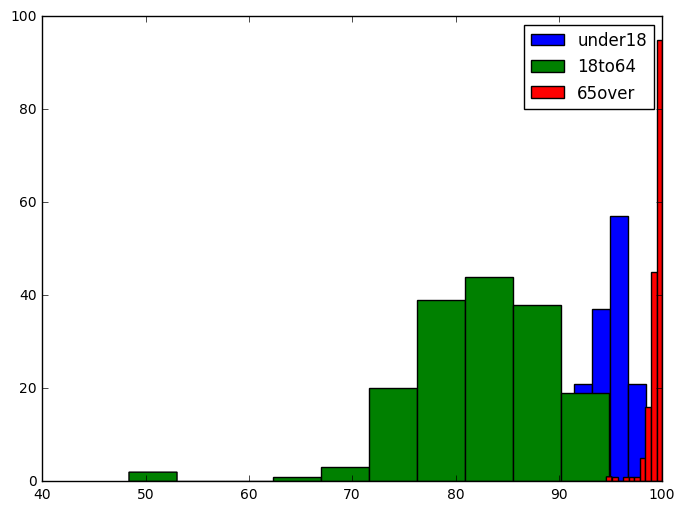

In [34]:
insurance = pandas.read_csv('datasets/insured_values.csv', sep=',', encoding='latin-1', skiprows=1, engine='python', index_col='Geography')
insurance.rename(columns={
    'Percent Insured; Estimate; AGE - Under 18 years' : 'under18',
    'Percent Insured; Estimate; AGE - 18 to 64 years' : '18to64',
    'Percent Insured; Estimate; AGE - 65 years and older' : '65over',
    'Total; Estimate; Civilian noninstitutionalized population' : 'population'
}, inplace=True)

ageGroups = ['under18', '18to64', '65over']

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for ageGroup in ageGroups:
    plt.hist(insurance[ageGroup], label=ageGroup)
plt.legend()

In terms of age, the deepest concentration seem to the older, above 65 population. Relating this back to population, the greater the population, the more senior citizens there would be. If senior citizens consistently had the highest rates of healthcare access, it would have a tremendous effect size on the HDI. I became curious how the population of senior citizens scaled as population grew-- could it be possible that the effect size was even larger than anticipated? This would be true if higher population regions not only have more senior citizens due to simply having more people, but also having a higher percentage of senior citizens as well:

under18pop , Slope:  0.233095989395 , Intercept:  4827.60409385
18to64pop , Slope:  0.638634979807 , Intercept:  -12462.2191982
65overpop , Slope:  0.128269030798 , Intercept:  7634.61510432


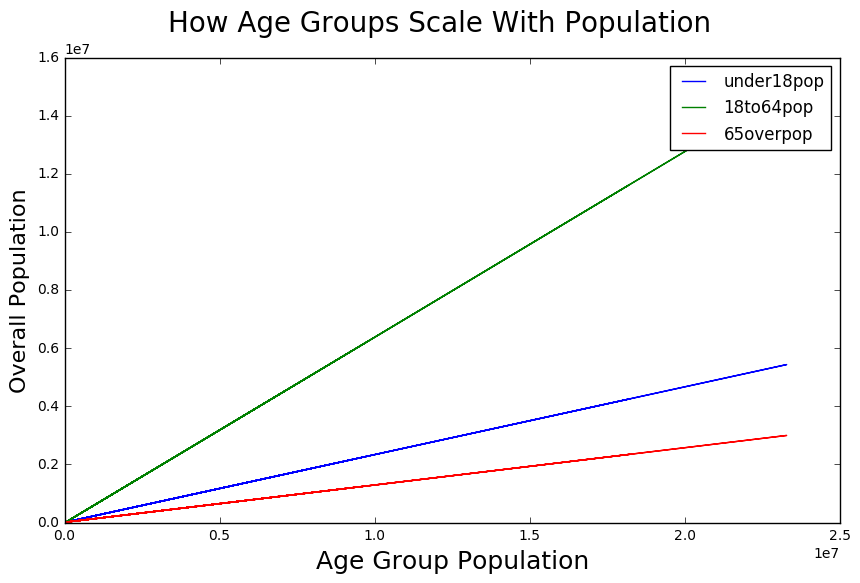

In [43]:
insurance.rename(columns={
        'Total; Estimate; AGE - Under 18 years' : 'under18pop',
        'Total; Estimate; AGE - 18 to 64 years' : '18to64pop',
        'Total; Estimate; AGE - 65 years and older' : '65overpop',
        'Total; Estimate; Civilian noninstitutionalized population' : 'population'
    }, inplace=True)

ageGroups = ['under18pop', '18to64pop', '65overpop']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for line in ageGroups:
    m, b = numpy.polyfit(insurance['population'], insurance[line], 1)
    print(line, ', Slope: ', m, ', Intercept: ', b)
    plt.plot(insurance['population'], m*insurance['population'] + b, '-', label=line)
plt.legend()
plt.suptitle('How Age Groups Scale With Population', fontsize=20)
plt.xlabel('Age Group Population', fontsize=18)
plt.ylabel('Overall Population', fontsize=16)

The slope of the linear model for the 65 and older group of residents is less than the other two groups. We can interpret this as meaning it does not grow nearly as fast proportionally, and thus does not have as large an impact on our well-being index as we hypothesized.

This leads us to looking at another aspect of the insured demographic-- income, which is coincidentally another factor in our composite well-being index. As the below shows, there seems to a direct correlation when looking at the distribution of insured residents throughout the country as income grows:

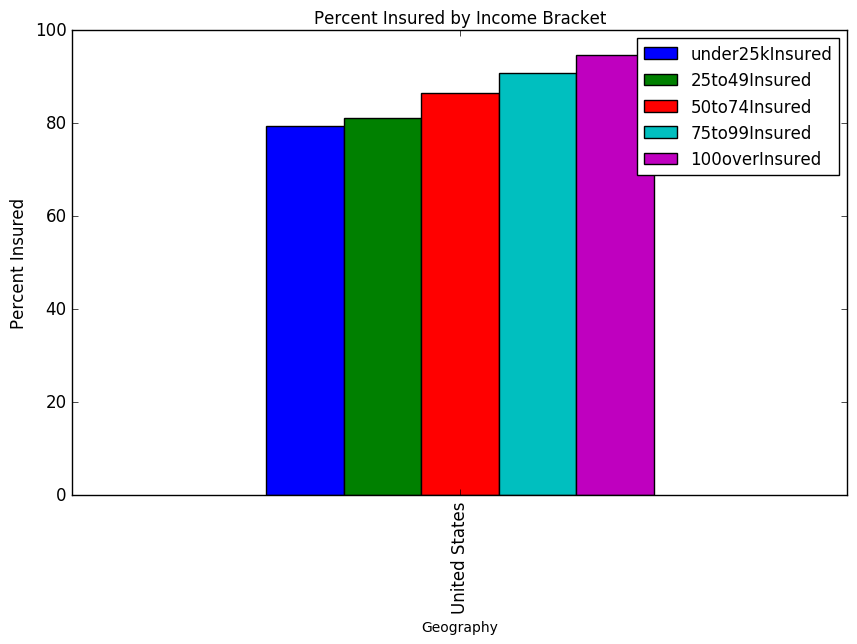

In [46]:
us_insurance = pandas.read_csv('datasets/us_insurance.csv', sep=',', encoding='latin-1', skiprows=1, engine='python', index_col='Geography')
us_insurance.rename(columns={
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - Under $25,000':'under25kInsured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $25,000 to $49,999':'25to49Insured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $50,000 to $74,999':'50to74Insured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $75,000 to $99,999':'75to99Insured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $100,000 and over':'100overInsured'
    }, inplace=True)
us_insurance_income = us_insurance[['under25kInsured', '25to49Insured', '50to74Insured', '75to99Insured', '100overInsured']]
ax = us_insurance_income.plot(kind='bar', title ="Percent Insured by Income Bracket", figsize=(10, 6), legend=True, fontsize=12)
ax.set_ylabel("Percent Insured", fontsize=12)

Thus, if we want to get a deeper understanding of why healthcare access, we inevitably need to look at net income. I began to focus on why high population densities tend to allow for greater economic opportunity (in terms of greater wages), with the question being "why would it not be proportional"? In other words, what causes people to earn more in more densely populated areas when they're doing the same jobs as people in less populated regions? Cost of living is obviously a factor, but what drives that up?

The next obvious variable to analyze is that of labor and occupation. Due to the United States' current policies on health insurance, most healthcare access is employer-based anyway. Analyzing occupation distribution at different population levels seemed to be the next step.

/Users/junzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/junzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


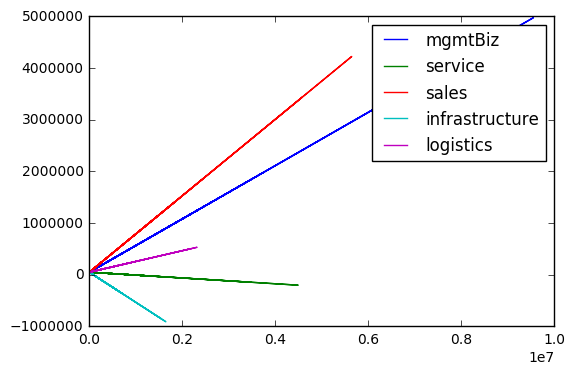

In [83]:
import statsmodels.formula.api as sm
demographics = pandas.read_csv('datasets/demographic_info.csv', sep=',', encoding='latin-1', skiprows=1, engine='python', index_col='Geography')
demographics.rename(columns={'Total; Estimate; OCCUPATION - Management, business, science, and arts occupations':'mgmtBiz',
 'Total; Estimate; OCCUPATION - Service occupations':'service', 
 'Total; Estimate; OCCUPATION - Sales and office occupations':'sales', 
 'Total; Estimate; OCCUPATION - Natural resources, construction, and maintenance occupations':'infrastructure', 
 'Total; Estimate; OCCUPATION - Production, transportation, and material moving occupations':'logistics',
 'Total; Estimate; Total population':'population'}, inplace=True)

occupations = demographics[['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']];

# multiplying percentage by population to get totals
for idx, occupation in enumerate(['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']):
    occupations[occupation] = occupations[occupation]/100 * demographics['population'] 

occupations['Income'] = demographics['Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households']
result = sm.ols(formula="Income ~ mgmtBiz + service + sales + infrastructure + logistics", data=occupations).fit()

for idx, occupation in enumerate(['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']):
    x = occupations[occupation]
    y = float(result.params[0]) + float(result.params[idx + 1]) * x
    plt.plot(x, y, '-', label=occupation)

plt.legend()
plt.show()

Unsurprsingly, it appears that management and business jobs have a larger coefficient, and contribute a bit more to net income. The below graph also shows that these occupations also tend to scale with population as well, one interpretation being that high-population regions tend to offer more of these higher paying roles. <b>WHY?</b>

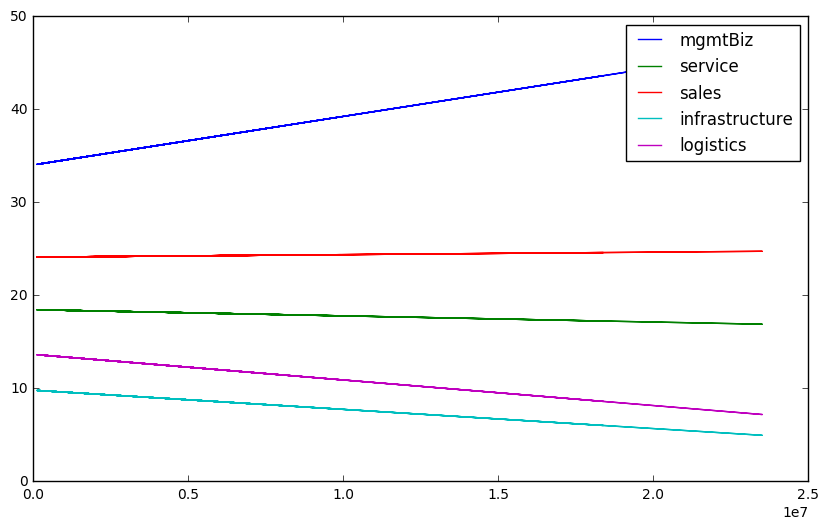

In [87]:
# occupation_cats = occupations.drop('population', 1)

plt.figure(figsize=(10, 6))
for occ in occupation_cats:    
    x = demographics['population']
    y = occupation_cats[occ]
    m, b = numpy.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-', label=occ)
#     print(occ, ' ... slope: ', m, '... intercept: ', b)
    
ax.set_ylabel("Percent Insured", fontsize=12)    
plt.legend()

In [85]:
demographics.rename(columns={'Total; Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining':'agriculture',
                             'Total; Estimate; INDUSTRY - Construction':'construction',
                             'Total; Estimate; INDUSTRY - Manufacturing':'manufacturing',
                             'Total; Estimate; INDUSTRY - Wholesale trade':'wholesale',
                             'Total; Estimate; INDUSTRY - Retail trade':'retail',
                             'Total; Estimate; INDUSTRY - Transportation and warehousing, and utilities':'utilities',
                             'Total; Estimate; INDUSTRY - Information':'information',
                             'Total; Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing':'finance',
                             'Total; Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services':'scientific',
                             'Total; Estimate; INDUSTRY - Educational services, and health care and social assistance':'eduHealth',
                             'Total; Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services':'artsRecreation',
                             'Total; Estimate; INDUSTRY - Other services (except public administration)':'other'}, inplace=True)


industries = demographics[['population', 'agriculture', 'construction', 'manufacturing', 'wholesale', 'retail', 'utilities', 'information', 'finance', 'scientific', 'eduHealth', 'artsRecreation', 'other']];
industries.corr()

,population,agriculture,construction,manufacturing,wholesale,retail,utilities,information,finance,scientific,eduHealth,artsRecreation,other
population,1.000000,-0.189912,-0.050594,-0.130431,0.217612,-0.230971,0.139509,0.553496,0.254389,0.554486,-0.172929,-0.011876,0.128940
agriculture,-0.189912,1.000000,0.094011,-0.115430,0.295109,-0.130893,0.063058,-0.421653,-0.297527,-0.346967,-0.187131,-0.197640,-0.035841
construction,-0.050594,0.094011,1.000000,-0.400583,0.097719,0.369611,0.011630,0.034098,-0.027428,0.194795,-0.361673,0.308861,0.464247
manufacturing,-0.130431,-0.115430,-0.400583,1.000000,0.124863,-0.244057,0.028949,-0.236774,-0.227942,-0.407022,-0.086992,-0.394328,-0.224107
wholesale,0.217612,0.295109,0.097719,0.124863,1.000000,-0.045397,0.515994,0.043489,0.080555,0.022234,-0.393429,-0.300572,0.086085
retail,-0.230971,-0.130893,0.369611,-0.244057,-0.045397,1.000000,0.046488,-0.071310,-0.071429,-0.081946,-0.082659,0.299881,0.259091
utilities,0.139509,0.063058,0.011630,0.028949,0.515994,0.046488,1.000000,-0.047828,0.007457,-0.031943,-0.323832,-0.127017,0.089405
information,0.553496,-0.421653,0.034098,-0.236774,0.043489,-0.071310,-0.047828,1.000000,0.356336,0.667474,-0.094275,0.089118,0.063393
finance,0.254389,-0.297527,-0.027428,-0.227942,0.080555,-0.071429,0.007457,0.356336,1.000000,0.341481,-0.173093,0.066178,-0.183973
scientific,0.554486,-0.346967,0.194795,-0.407022,0.022234,-0.081946,-0.031943,0.667474,0.341481,1.000000,-0.314536,0.214350,0.142665


agriculture  ...  slope:  -2.0235986966e-07 ... intercept:  2.72018545146
construction  ...  slope:  -2.024438251e-08 ... intercept:  6.16000392585
manufacturing  ...  slope:  -2.11745294554e-07 ... intercept:  11.8029121882
wholesale  ...  slope:  3.97120457632e-08 ... intercept:  2.5552342915
retail  ...  slope:  -8.10009321435e-08 ... intercept:  11.9994760383
utilities  ...  slope:  5.02400064498e-08 ... intercept:  4.62634958176
information  ...  slope:  9.25349326468e-08 ... intercept:  1.61919310781
finance  ...  slope:  1.64296822155e-07 ... intercept:  5.73552665444
scientific  ...  slope:  4.27537803564e-07 ... intercept:  8.7155110159
eduHealth  ...  slope:  -2.25985872477e-07 ... intercept:  24.633801996
artsRecreation  ...  slope:  -9.73014115154e-09 ... intercept:  9.71520066325
other  ...  slope:  2.36570720597e-08 ... intercept:  4.81096797182
1711171.3333333333


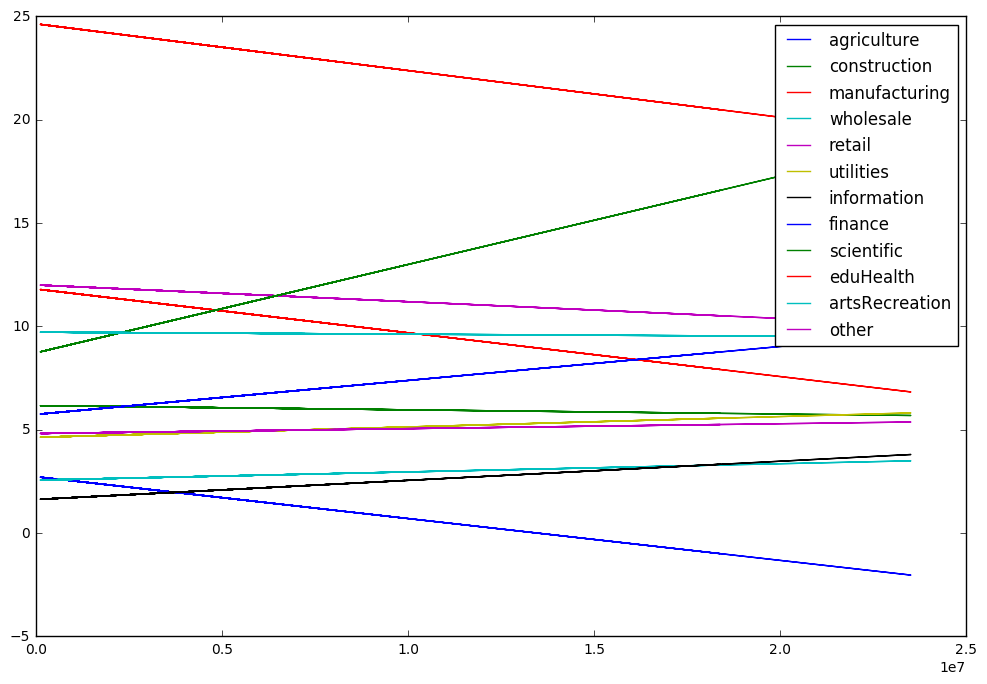

In [14]:
# Working theory-- it takes a certain amount of population to cover essential occupations
# Once those are covered, we can move onto management and business

# removing population from dataframe
industry_cats = industries.drop('population', 1)

plt.figure(figsize=(12, 8))
for ind in industry_cats:    
    x = demographics['population']
    y = industry_cats[ind]
    
#     plt.plot(x, y, '.', label=ind)
    m, b = numpy.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-', label=ind)

    print(ind, ' ... ', 'slope: ', m, '... intercept: ', b)
    
ax.set_ylabel("Percent Insured", fontsize=12)    
plt.legend()
print(industries['population'].mean())

In [8]:
demographics['Foreign Born Pct'] = demographics['Foreign born; Estimate; Total population']/demographics['Total; Estimate; Total population']
demographics['Foreign Born Pct'].quantile([.25, .5, .75])

0.25    0.046520
0.50    0.061165
0.75    0.093697
Name: Foreign Born Pct, dtype: float64

In [16]:
posIndustries = industry_cats[['wholesale', 'utilities', 'information', 'finance', 'scientific']];
posOccupations = occupation_cats[['mgmtBiz', 'sales']]

In order to determine impact, we can plot the foreign-born rates of different industries against our HDI metric to see if this makes a difference.

/Users/junzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


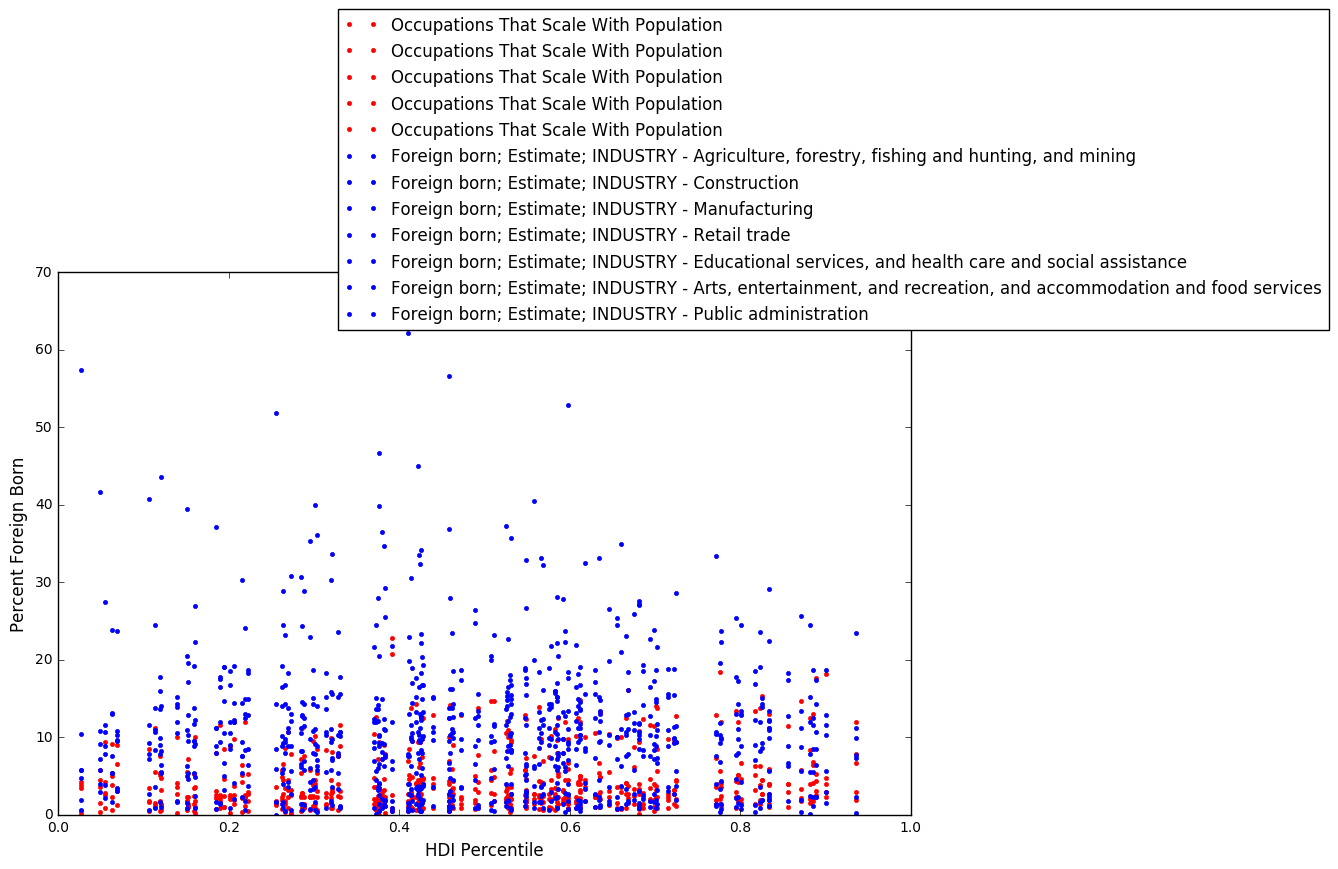

In [105]:
demographics.rename(columns={'Foreign born; Estimate; INDUSTRY - Wholesale trade':'wholesaleFor',
    'Foreign born; Estimate; INDUSTRY - Transportation and warehousing, and utilities':'utilitiesFor',
    'Foreign born; Estimate; INDUSTRY - Information':'informationFor',
    'Foreign born; Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing':'financeFor',
    'Foreign born; Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services':'scientificFor'}, inplace=True)

foreign_labor = demographics[['wholesaleFor', 'utilitiesFor', 'informationFor', 'financeFor', 'scientificFor']]
# foreign_labor['population'] = demographics['population']
# percentile rank
foreign_labor['HDI'] = full_table['HDI Percentile']
posSlopes = ['wholesaleFor', 'utilitiesFor', 'informationFor', 'financeFor', 'scientificFor']

plt.figure(figsize=(11, 7))
for labelName in posSlopes:
    plt.plot(foreign_labor['HDI'], foreign_labor[labelName], '.', color='red', label='Occupations That Scale With Population')
    
negSlopes = ['Foreign born; Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining',
'Foreign born; Estimate; INDUSTRY - Construction',
'Foreign born; Estimate; INDUSTRY - Manufacturing',
'Foreign born; Estimate; INDUSTRY - Retail trade',
'Foreign born; Estimate; INDUSTRY - Educational services, and health care and social assistance',
'Foreign born; Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services',
'Foreign born; Estimate; INDUSTRY - Public administration']

for labelName in negSlopes:
    plt.plot(foreign_labor['HDI'], demographics[labelName], '.', label=labelName, color='blue')

    
plt.ylabel("Percent Foreign Born", fontsize=12)
plt.xlabel("HDI Percentile", fontsize=12)
plt.legend(bbox_to_anchor=(1.5, 1.5))

In [21]:
# We'll count over 10% as high, separate it into "over 10% foreign born" vs. "under 10% foreign born"
above_10_foreign = demo_poverty_college[demo_poverty_college['Foreign Born Pct'] > 0.10]
under_10_foreign = demo_poverty_college[demo_poverty_college['Foreign Born Pct'] < 0.10]
print('Under 10% ', under_10_foreign['Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)'].mean(), 107)
print('Above 10% ', above_10_foreign['Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)'].mean(), 31)

# if p value below 5% then that means statistically significant
under_10_foreign.rename(columns={'Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)':'meanEarnings', 'Native; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - Below 100 percent of the poverty level' : 'nativePoverty', 'Foreign born; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - Below 100 percent of the poverty level' : 'foreignPoverty'}, inplace=True)
above_10_foreign.rename(columns={'Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)':'meanEarnings', 'Native; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - Below 100 percent of the poverty level' : 'nativePoverty', 'Foreign born; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - Below 100 percent of the poverty level' : 'foreignPoverty'}, inplace=True)

# can't find correlation like this because they're different sizes
# corrData = {'under10' : under_10_foreign , 'above10' : above_10_foreign }
# corrDF = pandas.DataFrame(data=corrData, )

under_10_plot = under_10_foreign.plot(kind='scatter', y='meanEarnings', x='Foreign Born Pct', legend=True, label="Under 10% Foreign-Born Regions", figsize=(20, 10))
above_10_foreign.plot(ax=under_10_plot, kind='scatter', y='meanEarnings', x='Foreign Born Pct', legend=True, label="Above 10% Foreign-Born Regions", color='r')

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        print(self.actual)
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()
        
        
class DiversityEffects(HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))

    def RunModel(self):
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

    
forData = under_10_foreign.meanEarnings, above_10_foreign.meanEarnings
ct = DiversityEffects(forData)
pvalue = ct.PValue()
pvalue

# it is occasionally 0.02

NameError: name 'demo_poverty_college' is not defined

To recap, the hypothesis we intended to test was whether or not regions with larger foreign populations tended to have higher mean earnings. We found this to be true, as the test statistic in our sample had an impact of about $10,457.60. To prove that this is statistically significant, we ran random models where the regions were evenly distributed, and the percentage of foreign-born residents were arbitrary. We received a p-value of 0.002, which means that this statistic is statistically significant.

In [20]:
demographics.rename(columns={'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White':'white',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American':'black',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native':'native',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian':'asian',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander':'pacific',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Some other race': 'hispanic'}, inplace=True)


race = demographics[['white','black','native','asian','pacific','hispanic']]
# probability of picking two people of diff race
race['diversity_index'] = 1 - (numpy.square(race['white']/100) + numpy.square(race['black']/100) + numpy.square(race['asian']/100) + numpy.square(race['native']/100) + numpy.square(race['pacific']/100))

/Users/junzhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
positiveSlopes = pandas.concat([race['diversity_index'], posIndustries, posOccupations], axis=1);
positiveSlopes.corr()

In [ ]:
income_causes = demographics[[
 'Total; Estimate; EARNINGS IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) FOR FULL-TIME, YEAR-ROUND WORKERS - Population 16 years and over with earnings - $75,000 or more',
 'Foreign born; Estimate; Total population',
 'Foreign born; Naturalized citizen; Estimate; Total population',
 'Foreign born; Not a U.S. citizen; Estimate; Total population',
 'Total; Estimate; Average family size',
 'Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor\'s degree']]

income_causes.corr()
https://www.bls.gov/opub/reports/race-and-ethnicity/archive/race_ethnicity_2012.pdf

In [ ]:
demo_poverty_college.rename(columns={'Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)':'meanEarnings', 'Native; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - Below 100 percent of the poverty level' : 'nativePoverty', 'Foreign born; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Population for whom poverty status is determined - Below 100 percent of the poverty level' : 'foreignPoverty'}, inplace=True)
povertyLevels = demo_poverty_college[['nativePoverty', 'foreignPoverty']]
povertyLevels.corr(method='pearson')

We have discovered that there is a distinction between regions with above 10% foreign-born residents and below 10% foreign-born residents in terms of averagie earnings.

We can now look at diversity in terms of race.

In [ ]:
racial_hdi.corr(method='spearman')
racial_hdi['professionalservices'] = demographics['Total; Estimate; OCCUPATION - Management, business, science, and arts occupations']

I then calculated the correlation of diversity against HDI.... I found that there wasn't a strong correlation between the diversity index and our HDI. This could be because 

However, when I plotted the scatterplot...

In [ ]:
racial_hdi['population'] = demographics['Total; Estimate; Total population']
racial_hdi.sort_values(by='asian').corr(method='pearson')

In [ ]:
x = racial_hdi['race_index']
y = racial_hdi['HDI Percentile']

m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(12, 8))
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')